In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [8]:
print(boston.target.shape)

(506,)


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

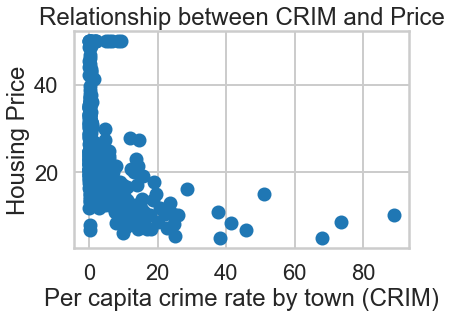

In [11]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
Negative, non-linear; same CRIM could correpsond to different housing for CRIM in the range of 0 to 15. There are a few outliers in the CRIM range of 0 to 15. 

# your turn: scatter plot between *RM* and *PRICE*
Numbers of room and housing price are positively related; the relationship looks linear; there a few outliers that seem to have high influence and high leverage (3.561, 27.5) (8.780, 21.9) or high influence and low leverage(5.875, 50).

In [12]:
bos[(bos.RM>5)&(bos.RM<6)&(bos.PRICE==50)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


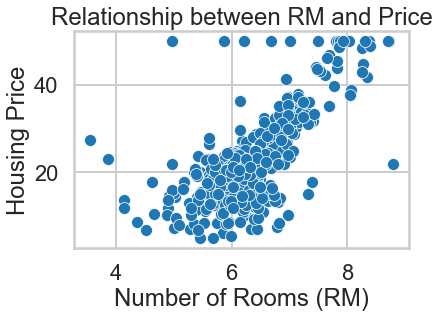

In [13]:
sns.scatterplot(x='RM', y='PRICE', data=bos)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

# your turn: scatter plot between *PTRATIO* and *PRICE*
Pupil-to-teacher ratio in schools seems to be negatively related to housing price, and relationship seems linear.

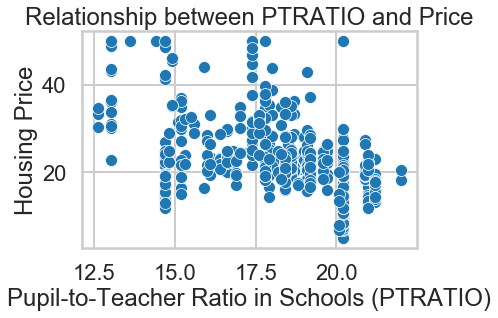

In [14]:
sns.scatterplot(x='PTRATIO', y='PRICE', data=bos)
plt.xlabel("Pupil-to-Teacher Ratio in Schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

# your turn: create some other scatter plots
Weighted distances to 5 boston employment centers are positively related to housing price.

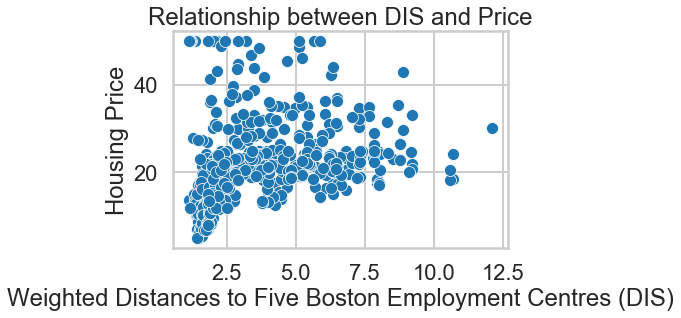

In [15]:
sns.scatterplot(x='DIS', y='PRICE', data=bos)
plt.xlabel("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")
plt.show()

It seems that full-value property-tax rate per $10,000 is negatively related to housing price.

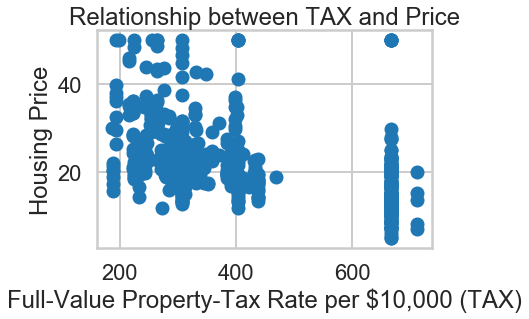

In [16]:
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel('Full-Value Property-Tax Rate per $10,000 (TAX)')
plt.ylabel('Housing Price')
plt.title('Relationship between TAX and Price')
plt.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

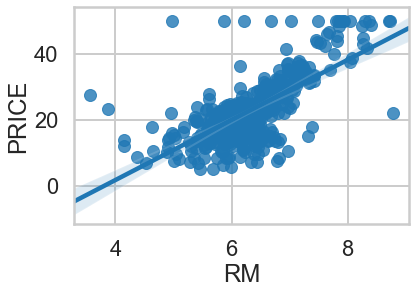

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

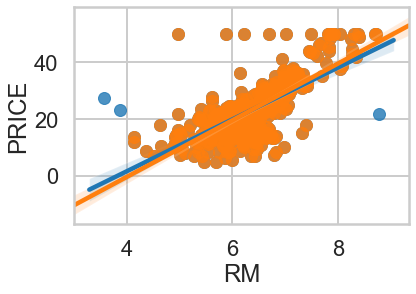

In [18]:
#remove a few outliers to see change of linear regression line
bos1 = bos[(bos.RM>4)&(bos.RM!=8.780)]
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
sns.regplot(y="PRICE", x="RM", data=bos1, fit_reg = True)
plt.show()

### Histograms
***


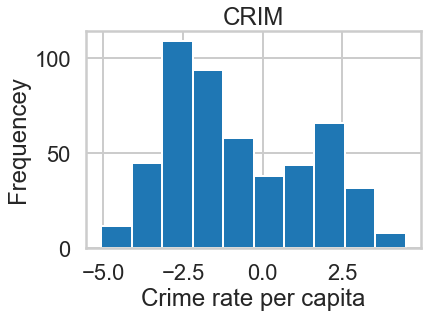

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

# your turn
Taking logarithm of data is to scale properly so that the bins with small numbers of data points can also be seen clearly. If not taken logarithm, CRIM beyond 20 cannot be seen in histogram.

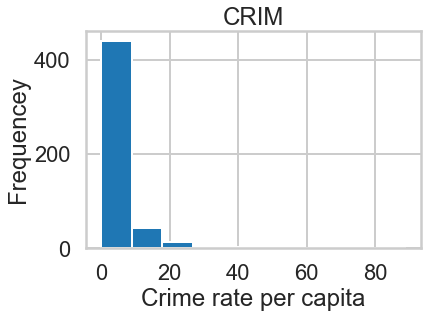

In [20]:
plt.hist(bos.CRIM,bins=10)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

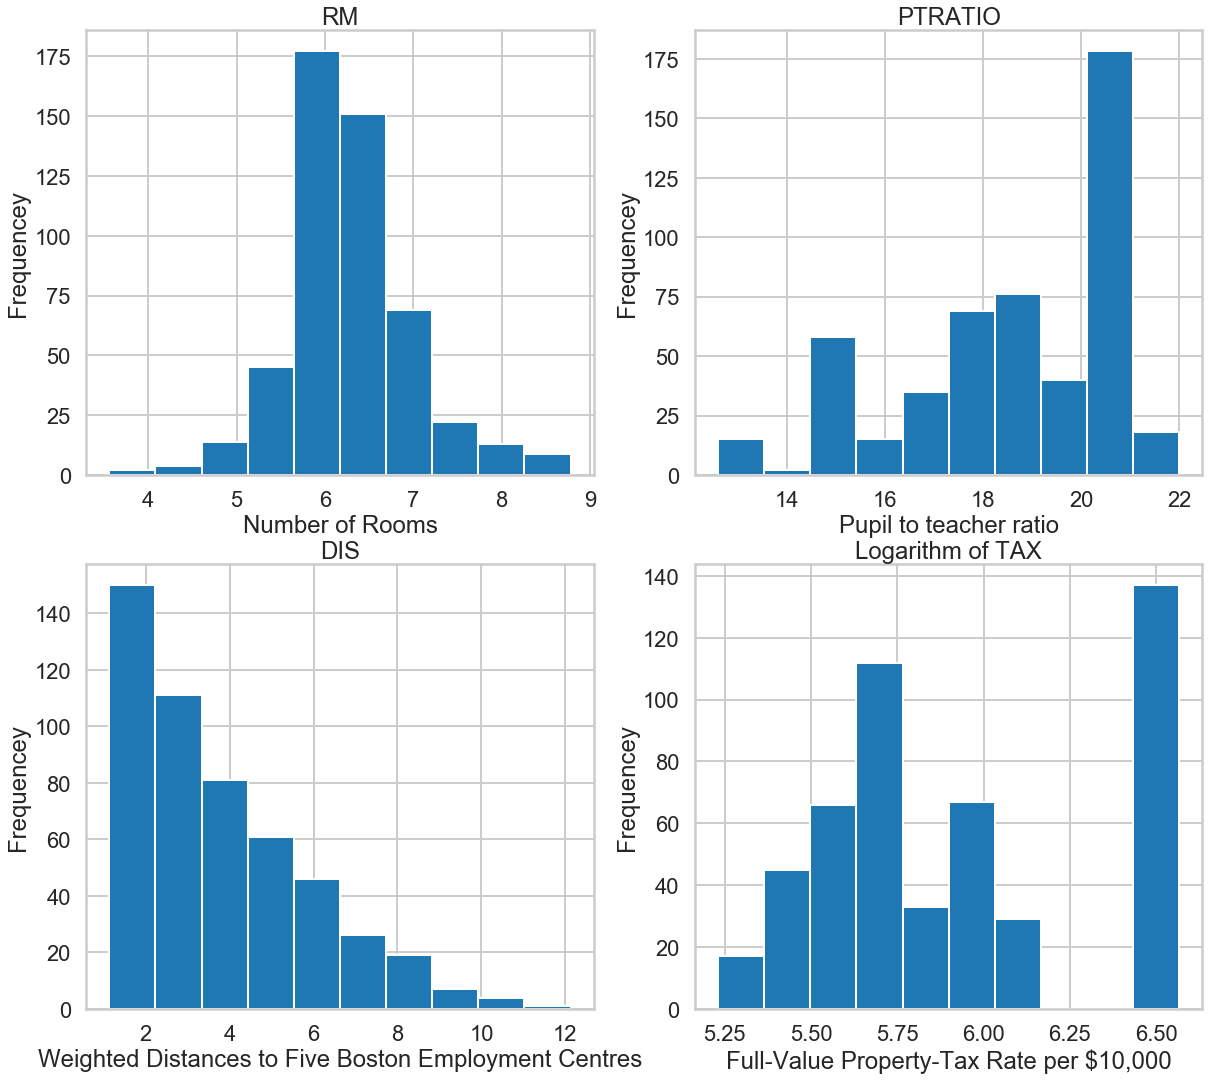

In [21]:
fig, axs = plt.subplots(2,2, figsize=(20,18))

axs[0,0].hist(bos.RM)
axs[0,0].set_title('RM')
axs[0,0].set_xlabel('Number of Rooms')
axs[0,0].set_ylabel('Frequencey')
axs[0,1].hist(bos.PTRATIO)
axs[0,1].set_title('PTRATIO')
axs[0,1].set_xlabel('Pupil to teacher ratio')
axs[0,1].set_ylabel('Frequencey')
axs[1,0].hist(bos.DIS)
axs[1,0].set_title('DIS')
axs[1,0].set_xlabel('Weighted Distances to Five Boston Employment Centres')
axs[1,0].set_ylabel('Frequencey')
axs[1,1].hist(np.log(bos.TAX))
axs[1,1].set_title('Logarithm of TAX')
axs[1,1].set_xlabel('Full-Value Property-Tax Rate per $10,000')
axs[1,1].set_ylabel('Frequencey')
plt.show()

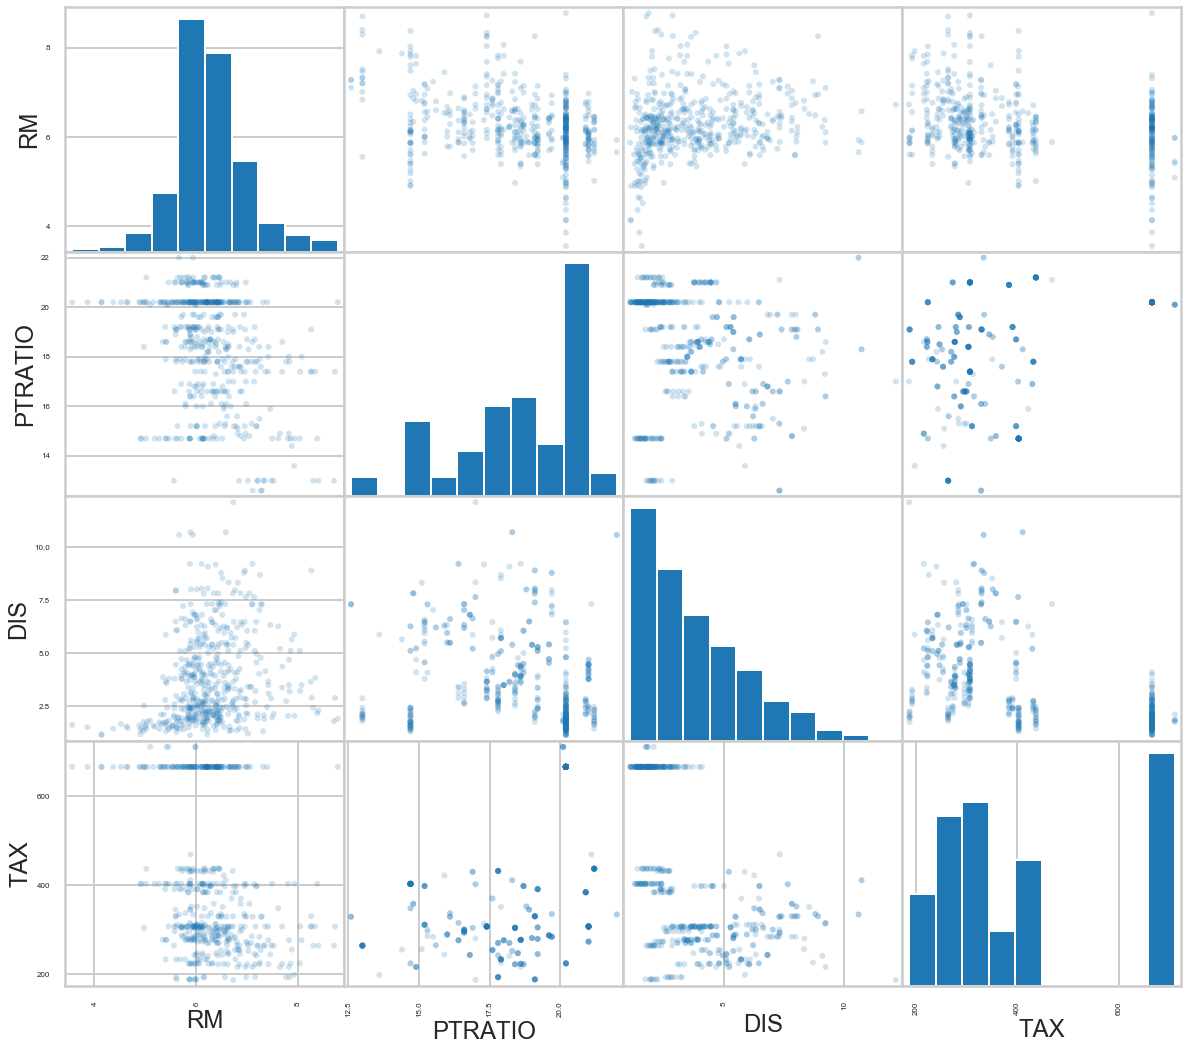

In [22]:
pd.plotting.scatter_matrix(bos[['RM', 'PTRATIO', 'DIS', 'TAX']], alpha=0.2, figsize=(20,18))
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           2.49e-74
Time:                        21:33:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

# your turn
The predicted price and original price seem to be very positively related, but there are outliers where predicted values are far away from original price. Some house are predicted to have 0 or negative values).

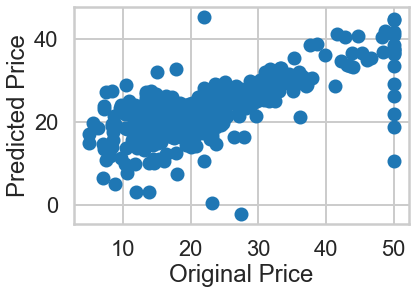

In [25]:
plt.scatter(bos.PRICE,m.fittedvalues)
plt.ylabel('Predicted Price')
plt.xlabel('Original Price')
plt.show()

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [27]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


# your turn
1. The regression should go through origin because if the house does not have values originally, it should not be predicted with values. Or if a house has values originally, it should not be predicted as no value or negative value.

2. Not enough. Uniform distribution is also i.i.d. i.i.d requires residuals to be independent and have constant variance. A set of data can be normally distributed, but with subsets that follow different normal distributions (e.g., different means or different variances). In addition, you could have two subsets that are dependent.

3. False. The normality assumption for linear regression applies to the errors, not the outcome variable. Errors' distribution is influenced by Y, so Y has to be continuous, unbounded and measured on an interval or ratio scale. Y's distribution is also influenced by X's. Sometimes you can get normal distribution for errors, but weird-looking Y.

In [29]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [32]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

# your turn
1. Most frequent predicted prices of houses is around 20. The distribution approximates normal distribution in the range of -5 to 45. There are 3 outliers, e.g. houses are predicted to have negative values. This is because these houses have small number of rooms (approximately 4) and low original values. The low original values are the result of several combination factors such as RM, CRIM, DIS and LSTAT. So the original values should be true data. These data should be preprocessed with transformation.
3. statsmodels provides easy access to tune formula according to needs and also gives information about detail statistics such as p-value and f-statistics. scikit-learn are easy to write and has faster algorithm.

In [34]:
y_pred = lm.predict(X)

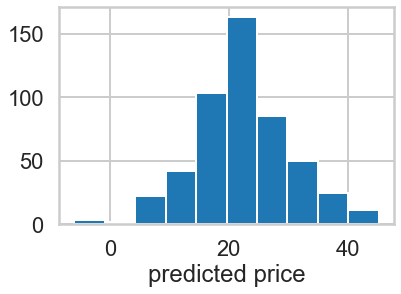

In [35]:
plt.hist(y_pred, bins=10)
plt.xlabel('predicted price')
plt.show()

In [36]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
bos[y_pred<0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
412,18.8110,0.0,18.1,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


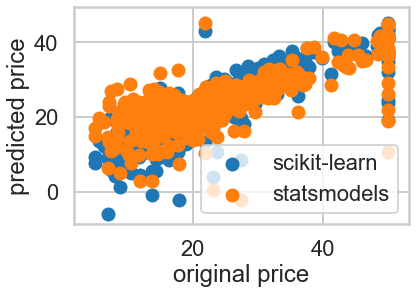

In [38]:
plt.scatter(bos.PRICE, y_pred, label='scikit-learn')
plt.scatter(bos.PRICE, m.fittedvalues, label='statsmodels')
plt.xlabel('original price')
plt.ylabel('predicted price')
plt.legend()
plt.show()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [39]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044004


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [40]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31908.789708316457


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

# your turn
1. PTRATIO increases by 1, avergae house value decreases by 2.1572. P = 0.000 means that PTRATIO is a significant predictor for PRICE. Intercept: when PTRATIO is 0, avergae house value is 62.3446, and confidence interval gives a range of average intercept. 
2. The percentage of variance in PRICE that can be explained by PTRATIO is 25.78%. 
3. Explantory power of fit parameters compared to "random" fit vectors is 175.1, meaning that the independent variable s we used in this model (namely 'PTRATIO') significantly improve the fit.
4. p-values for t statistics are very small, meaning both intercept and PTRATIO are significant predictor. Therefore, p-value for F statistic is very small, that's to say, these 2 variables significantly improve the fit of the model and it is very unlikely that these 2 variables have the same effect on the model as no variable at all. 

In [41]:
model1 = ols(formula='PRICE~PTRATIO',data=bos).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.61e-34
Time:                        21:33:52   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [42]:
model1.rsquared

0.257847318009223

In [43]:
model1.fvalue

175.1055428756955

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

# your turn
1. F-statistic is 242.3, meaning that independent variables ('CRIM', 'RM' and 'PTRATIO') significantly improve the fit of model than no independent variable.
2. R-squared is 0.592, meaning 59.2% of total variance in PRICE can be explained by a net of CRIM, RM AND PTRATIO. 
3. RM, PTRATIO and np.log(CRIM) are significant in predicting house price because p-value = 0.000. np.log(CRIM) increases by 1, PRICE drop -0.8198 averagely; PTRATIO increases by 1, PRICE drop -1.0043 averagely; RM increases by 1, PRICE increase by 7.2276 averagely.

In [44]:
model2 = ols(formula='PRICE~np.log(CRIM)+RM+PTRATIO', data=bos).fit()
# use np.log for skewed CRIM
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     242.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.42e-97
Time:                        21:33:52   Log-Likelihood:                -1613.7
No. Observations:                 506   AIC:                             3235.
Df Residuals:                     502   BIC:                             3252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.9943      4.065     -1.229   

In [45]:
model3 = ols(formula='PRICE~CRIM+RM+PTRATIO', data=bos).fit()
# use CRIM instead of np.log(CRIM)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           6.15e-98
Time:                        21:33:52   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

AIC for model1, model2, model3 and model4 is 3534, 3235, 3232, 3561 respectively. 
F statistics for model1, model2, model3 and model4 is 175, 242.3, 245.2, 70.74 respectively.
Model3 is the best.

In [46]:
model4 = ols(formula='PRICE~TAX + DIS', data=bos).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     70.74
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           8.47e-28
Time:                        21:33:52   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3561.
Df Residuals:                     503   BIC:                             3574.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9895      1.632     20.216      0.0


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

# Your turn.
1. The fitted values vs residuals plot shows obvious curvature and unequal variance, meaning that assuming linear relationship between PRICE and RM is not accurate. 
2. The plot shows curvatures at middle to higher quantile, meaning it is okay to assume linear relation between PRICE and RM at lower RM but not for middle to higher RM.
3. (1) fitted vs residual plot - advantage: help identify equal variance (homoscedastic) and if there is any pattern/outlier in residual distribution easily; disadvanatge: can't see which part of data worsens the fit easily. (2) quantitle plot- advantage: help access if residuals are normally distributed by judging if they follow the 45%-angle-upward straight line, and spot which quantitle deviate from this line easily; disadvantage: deviation might be to small to see. 
4. There are outliers. Most outliers tend to have low predicted price for high original price (underestimate the house value). And some outliers have negative predicted values.
5. High leverage points are 364, 365, 367, 368 and 372. High influence points are 364, 365, 367 and 368. Becase they are far away from the cluster of data points. High leverage could result from extreme predictor values.
6. Outliers are identified using zscore. When zscore(X)>3 or zscore(X)<-3, X is identified as outliers and is removed from dataset. R-squared is improved from 0.484 to 0.513 after outliers are removed, and F statistic is improved too. In the scatterplot of original price vs predicted price, the negative predicted prices are gone after outliers are removed from dataset.

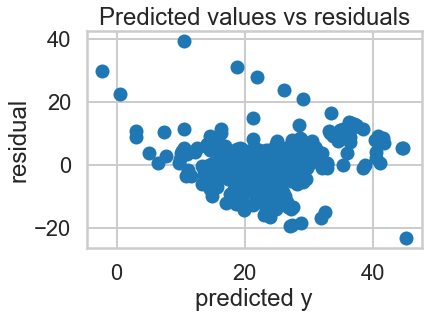

In [47]:
y_pred = m.fittedvalues
plt.scatter(y_pred, m.resid)
plt.xlabel('predicted y')
plt.ylabel('residual')
plt.title('Predicted values vs residuals')
plt.show()

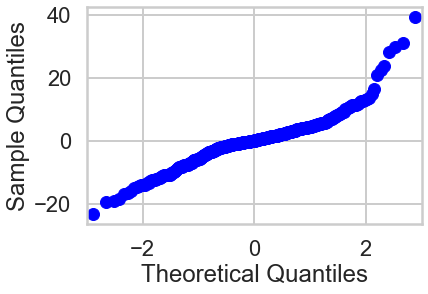

In [48]:
sm.qqplot(m.resid)
plt.show()

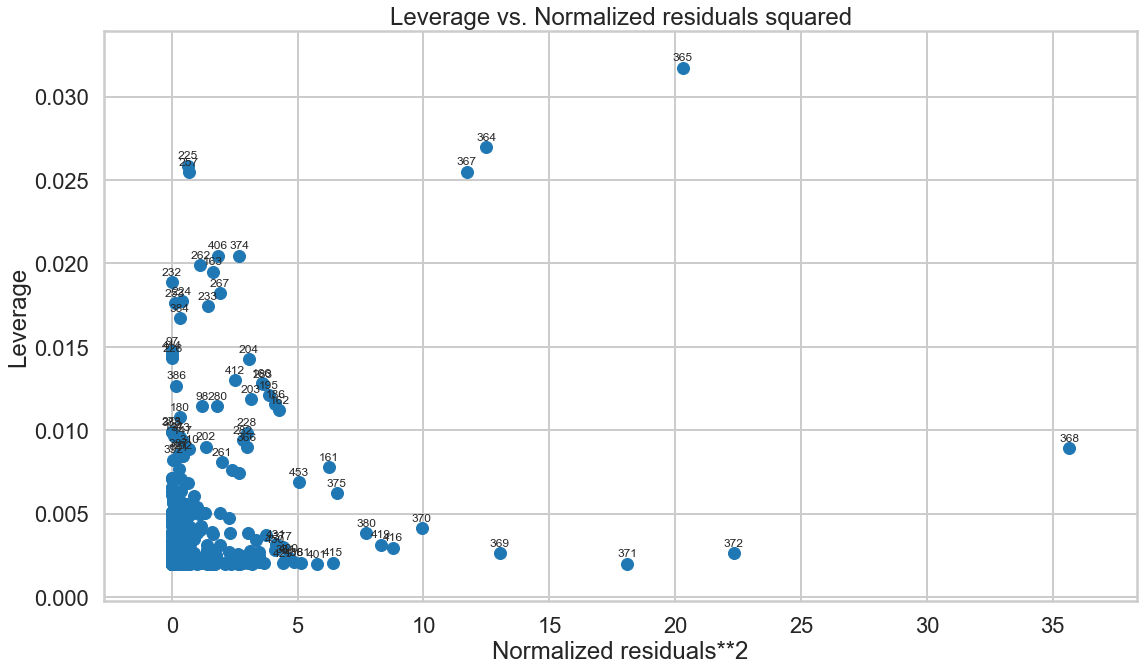

In [49]:
from statsmodels.graphics.regressionplots import *

fig = plot_leverage_resid2(m)
fig.set_size_inches(18.5, 10.5)
plt.show()

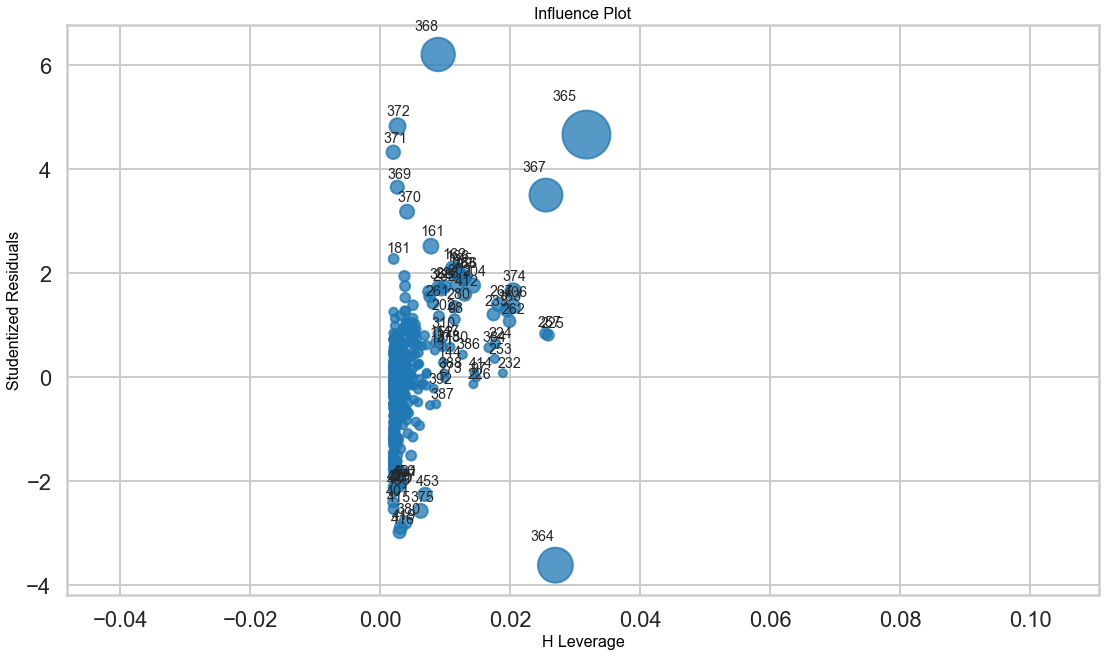

In [50]:
_ = influence_plot(m)
_.set_size_inches(18.5, 10.5)
plt.show()

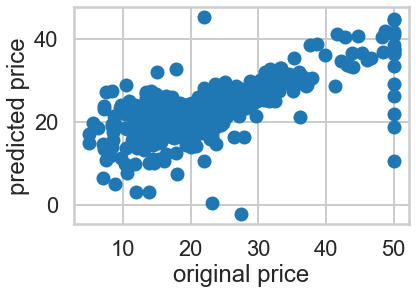

In [51]:
plt.scatter(bos.PRICE, m.fittedvalues)
plt.xlabel('original price')
plt.ylabel('predicted price')
plt.show()

In [52]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           2.49e-74
Time:                        21:33:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

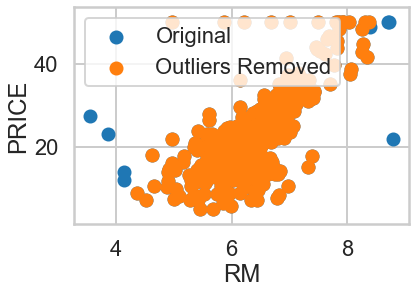

In [54]:
from scipy.stats import zscore

mask = (zscore(bos.RM)>3) | (zscore(bos.RM)<-3) 
rm_outliers = bos[~mask]
plt.scatter(bos.RM, bos.PRICE, label='Original')
plt.scatter(rm_outliers.RM, rm_outliers.PRICE, label='Outliers Removed')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [55]:
m1 = ols(formula='PRICE~RM', data=rm_outliers).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     522.6
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.57e-79
Time:                        21:34:41   Log-Likelihood:                -1621.4
No. Observations:                 498   AIC:                             3247.
Df Residuals:                     496   BIC:                             3255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.8182      2.780    -14.684      0.0

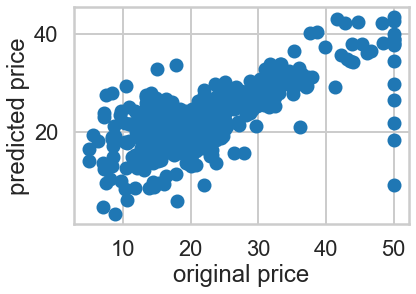

In [56]:
plt.scatter(rm_outliers.PRICE, m1.fittedvalues)
plt.xlabel('original price')
plt.ylabel('predicted price')
plt.show()